In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli

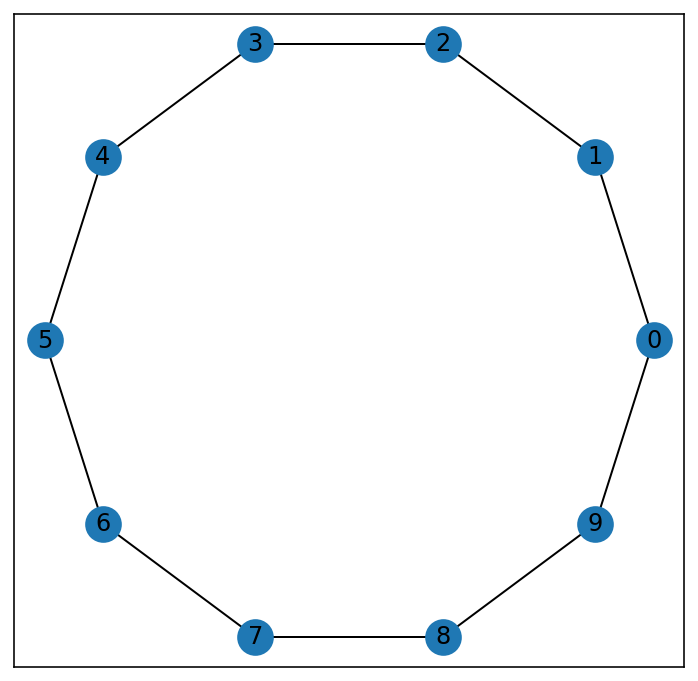

In [71]:
G = nx.watts_strogatz_graph(n = 10, k = 1, p = 0.0)
  
plt.figure(figsize = (6, 6))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos=pos)

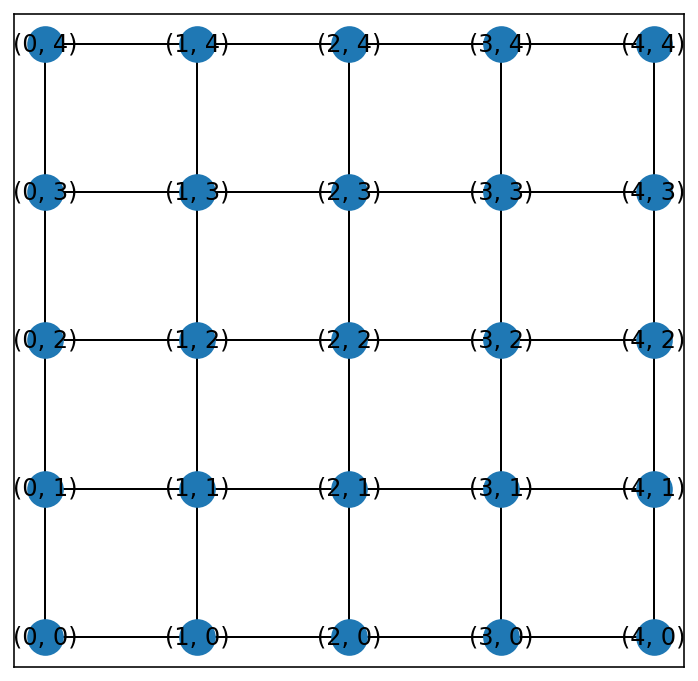

In [10]:
plt.figure(figsize = (6, 6))

G = nx.grid_2d_graph(3,3)
pos = dict( (n, n) for n in G.nodes() )
nx.draw_networkx(G, pos=pos)

In [11]:
print(G.nodes)
G.edges

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


EdgeView([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((0, 2), (0, 3)), ((0, 3), (1, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((1, 2), (1, 3)), ((1, 3), (2, 3)), ((1, 3), (1, 4)), ((1, 4), (2, 4)), ((2, 0), (3, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((2, 3), (2, 4)), ((2, 4), (3, 4)), ((3, 0), (4, 0)), ((3, 0), (3, 1)), ((3, 1), (4, 1)), ((3, 1), (3, 2)), ((3, 2), (4, 2)), ((3, 2), (3, 3)), ((3, 3), (4, 3)), ((3, 3), (3, 4)), ((3, 4), (4, 4)), ((4, 0), (4, 1)), ((4, 1), (4, 2)), ((4, 2), (4, 3)), ((4, 3), (4, 4))])

In [12]:
G[1,1]

AtlasView({(0, 1): {}, (2, 1): {}, (1, 0): {}, (1, 2): {}})

# Implement 1D Grid and rewire using an $\omega$ parameter

A network $G$ is a tuple (v, e) contains:

- $N$ nodes or vertexs $v \in \{1, 2, \dots, N \}$
- $K$ average connection per node (network degree).
  - $K = K_l + K_r$, with $K_l$: local connections, $K_r$: random shortcuts.
- $\omega = K_r / K$, $\omega \in (0,1)$.

For $\omega=1$ we have a random network: https://en.wikipedia.org/wiki/Erdős–Rényi_model

In [50]:
# Random network
N = 10  # nodes
K = 1.5  # average connectivity
p = K / N  # connection probability

np.random.seed(1)
adjacency_matrix = bernoulli.rvs(p, size=(N, N))
np.fill_diagonal(adjacency_matrix, 0)
adjacency_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 0]])

In [51]:
from_node, to_node = np.where(adjacency_matrix)
edges = [ei for ei in zip(from_node, to_node)]
print(edges)

[(1, 3), (2, 1), (2, 4), (2, 5), (2, 9), (3, 2), (4, 0), (4, 6), (6, 8), (7, 0), (7, 6), (8, 0), (8, 5), (8, 7), (9, 1), (9, 6)]


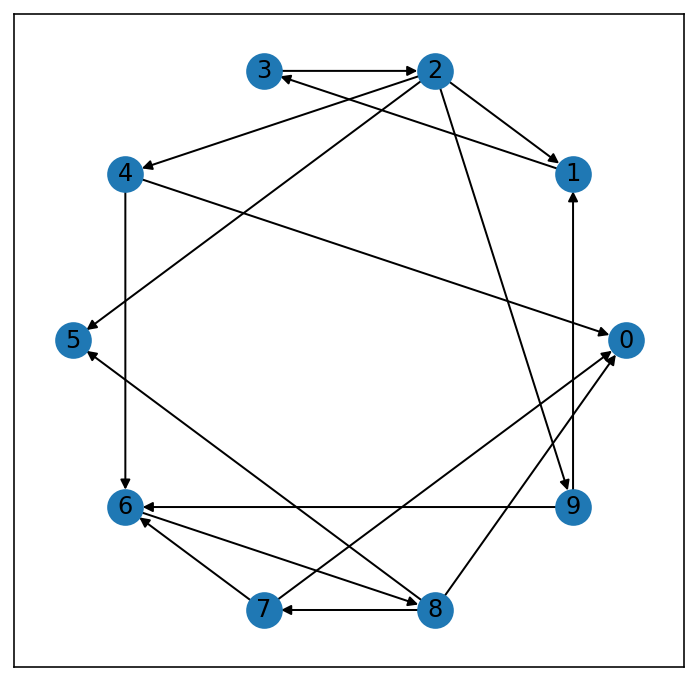

In [52]:
ERG = nx.DiGraph()
ERG.add_nodes_from(range(10))
ERG.add_edges_from(edges)
pos = nx.circular_layout(ERG)
plt.figure(figsize=(6,6))
nx.draw_networkx(ERG, pos=pos)

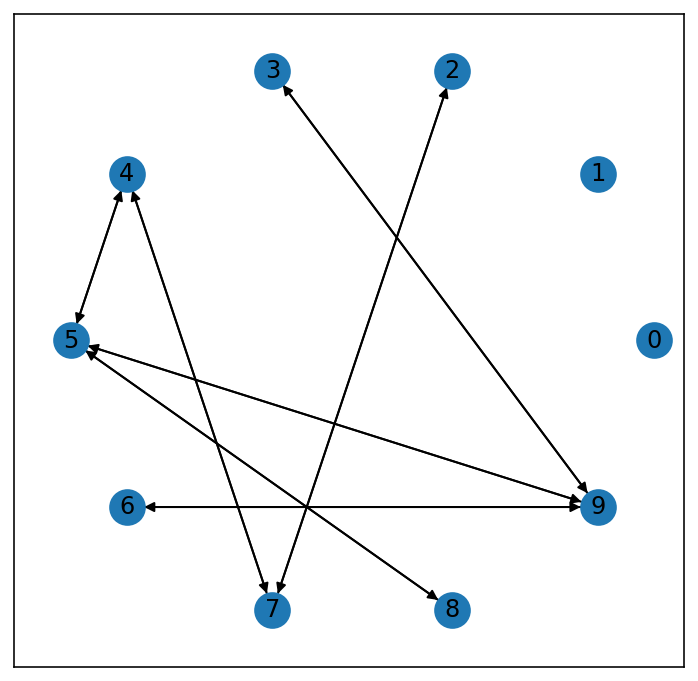

In [69]:
p = 0.15
ERGsym = np.zeros((N, N), dtype='int')
for i in range(N):
    for j in range(i+1, N):
        value_ij = bernoulli.rvs(p)
        ERGsym[i, j] = value_ij
        ERGsym[j, i] = value_ij

from_node, to_node = np.where(ERGsym)
edges = [ei for ei in zip(from_node, to_node)]

ERGs = nx.DiGraph()
ERGs.add_nodes_from(range(10))
ERGs.add_edges_from(edges)
pos = nx.circular_layout(ERGs)
plt.figure(figsize=(6,6))
nx.draw_networkx(ERGs, pos=pos)

In [63]:
ERGsym

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

## Regular ring (1D grid) with $k$ nearest neighbors

In [79]:
N = 10
K = 4
nodes = np.array(range(N))
Ring = np.array([[nodes-(i+1), nodes+(i+1)] for i in range(K//2)]).reshape(-1, N)  # Remove reshape
Ring = np.transpose(Ring)  # Comment this line
Ring, np.shape(Ring)

(array([[-1,  1, -2,  2],
        [ 0,  2, -1,  3],
        [ 1,  3,  0,  4],
        [ 2,  4,  1,  5],
        [ 3,  5,  2,  6],
        [ 4,  6,  3,  7],
        [ 5,  7,  4,  8],
        [ 6,  8,  5,  9],
        [ 7,  9,  6, 10],
        [ 8, 10,  7, 11]]),
 (10, 4))

In [83]:
# Corrections
Ring[np.where(Ring < 0)] = Ring[np.where(Ring < 0)] + N
Ring[np.where(Ring >= N)] = Ring[np.where(Ring >= N)] - N

Ring

array([[9, 1, 8, 2],
       [0, 2, 9, 3],
       [1, 3, 0, 4],
       [2, 4, 1, 5],
       [3, 5, 2, 6],
       [4, 6, 3, 7],
       [5, 7, 4, 8],
       [6, 8, 5, 9],
       [7, 9, 6, 0],
       [8, 0, 7, 1]])

In [86]:
edges = [(i, vi) for i in range(N) for vi in Ring[i]] 
print(edges)

[(0, 9), (0, 1), (0, 8), (0, 2), (1, 0), (1, 2), (1, 9), (1, 3), (2, 1), (2, 3), (2, 0), (2, 4), (3, 2), (3, 4), (3, 1), (3, 5), (4, 3), (4, 5), (4, 2), (4, 6), (5, 4), (5, 6), (5, 3), (5, 7), (6, 5), (6, 7), (6, 4), (6, 8), (7, 6), (7, 8), (7, 5), (7, 9), (8, 7), (8, 9), (8, 6), (8, 0), (9, 8), (9, 0), (9, 7), (9, 1)]


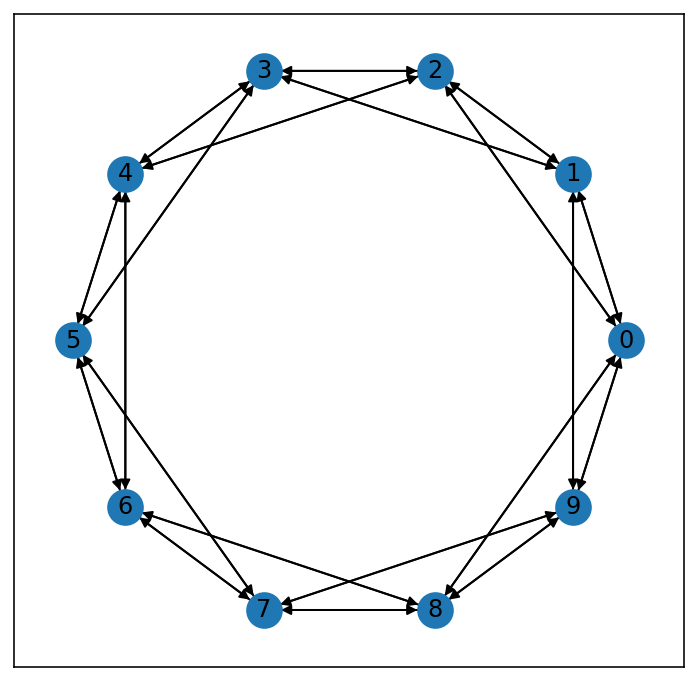

In [87]:
RN = nx.DiGraph()
RN.add_nodes_from(range(10))
RN.add_edges_from(edges)
pos = nx.circular_layout(RN)
plt.figure(figsize=(6,6))
nx.draw_networkx(RN, pos=pos)

In [100]:
list(RN.neighbors(0))

[9, 1, 8, 2]

In [107]:
set(range(N)) - set(Ring[0]) - set([0])

{3, 4, 5, 6, 7}

In [106]:
def rewire(node_i, adj_list, omega=0.0):
    changed = 0
    for i,vi in enumerate(adj_list[node_i]):
        available_nodes = set(range(N)) - set(adj_list[node_i]) - set([node_i])
        if np.random.random() < omega:
            changed = 1
            candidate = np.random.choice(list(available_nodes))
            adj_list[node_i][i] = candidate
    return changed

In [109]:
w = 0.25
[rewire(i, Ring, w) for i in range(N)]

[1, 0, 1, 1, 1, 0, 1, 1, 1, 1]

In [110]:
Ring

array([[6, 1, 8, 2],
       [0, 2, 9, 3],
       [1, 3, 8, 4],
       [2, 4, 0, 5],
       [1, 5, 2, 6],
       [4, 6, 3, 7],
       [5, 7, 0, 8],
       [6, 8, 1, 4],
       [7, 9, 6, 1],
       [8, 0, 5, 3]])

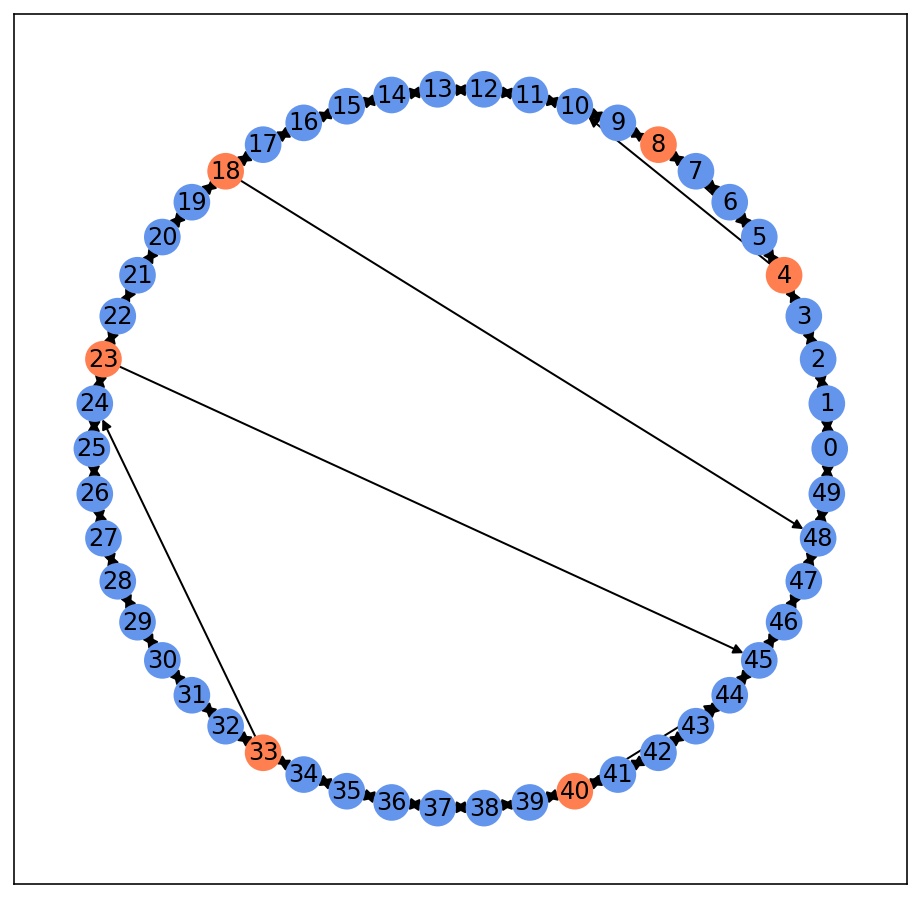

In [117]:
np.random.seed(0)

N = 50
K = 4

# Create ring
nodes = np.array(range(N))
Ring = np.array([[nodes-(i+1), nodes+(i+1)] for i in range(K//2)]).reshape(-1, N)
Ring = np.transpose(Ring)
Ring, np.shape(Ring)
# Correct borders
Ring[np.where(Ring < 0)] = Ring[np.where(Ring < 0)] + N
Ring[np.where(Ring >= N)] = Ring[np.where(Ring >= N)] - N

w = 0.05
changed_nodes = [rewire(i, Ring, w) for i in range(N)]

color_map = ['coral' if cn else "cornflowerblue" for cn in changed_nodes]

edges = [(i, vi) for i in range(N) for vi in Ring[i]] 

SW = nx.DiGraph()
SW.add_nodes_from(range(N))
SW.add_edges_from(edges)
pos = nx.circular_layout(SW)
plt.figure(figsize=(8,8))
nx.draw_networkx(SW, pos=pos, node_color=color_map)

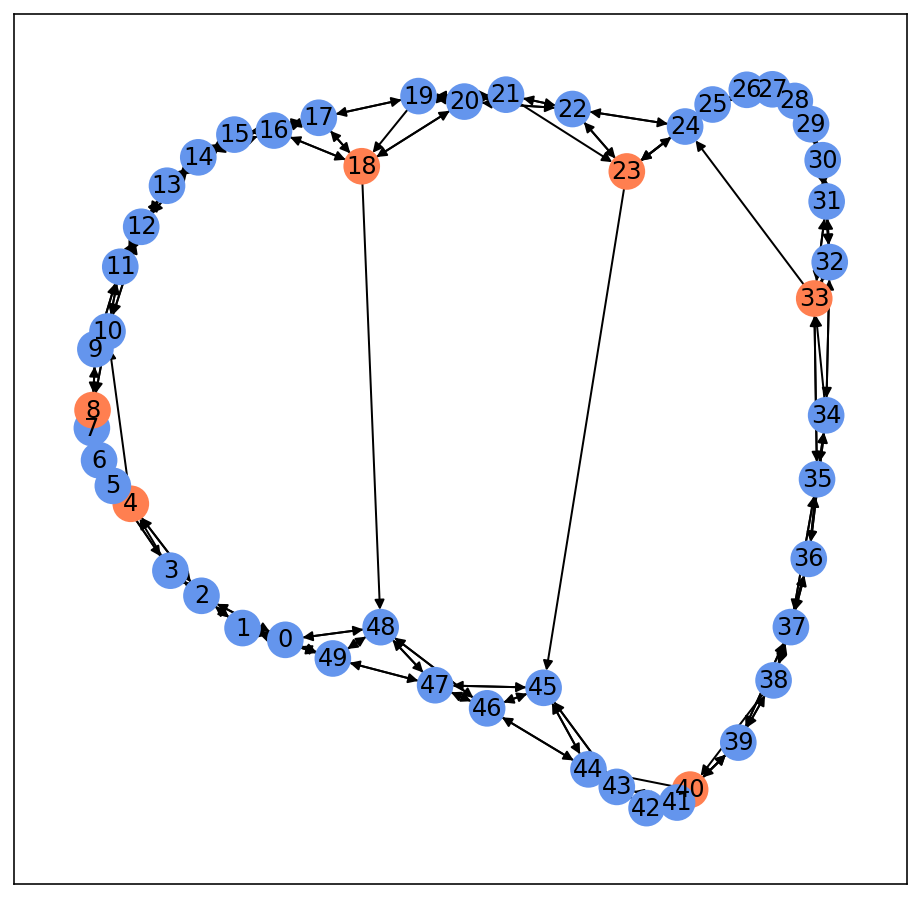

In [118]:
pos = nx.spectral_layout(SW)
plt.figure(figsize=(8,8))
nx.draw_networkx(SW, pos=pos, node_color=color_map)

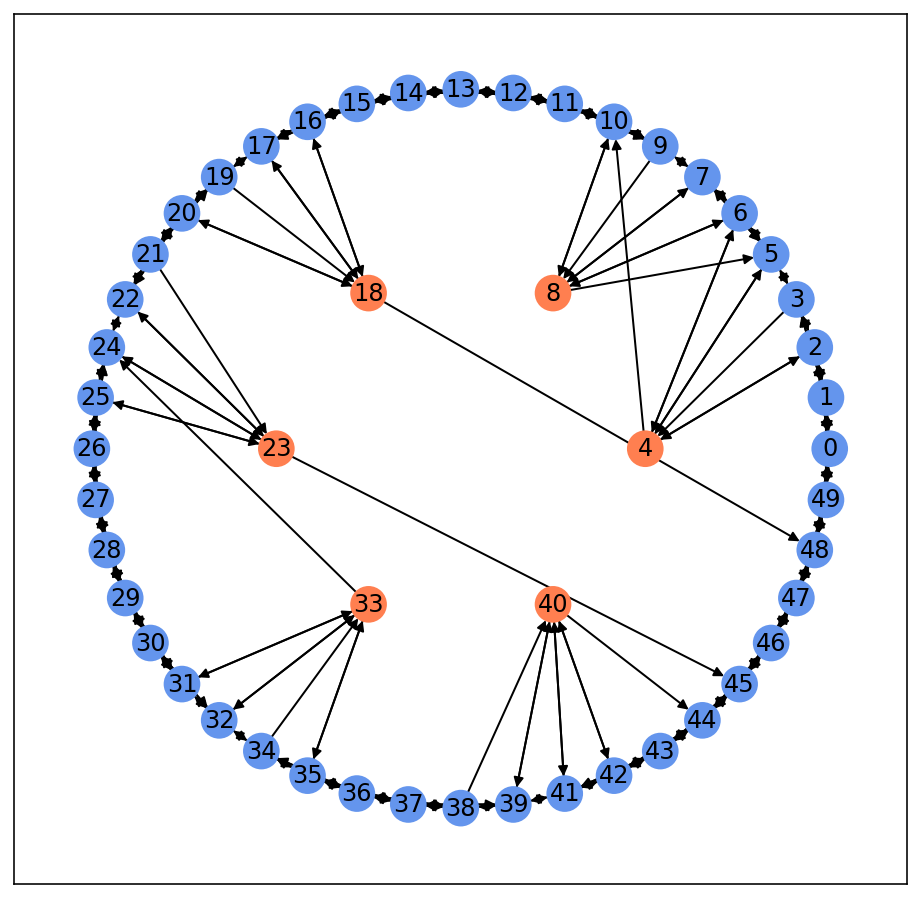

In [124]:
centers = np.where(changed_nodes)[0]
satellites = list(set(range(N)) - set(centers))
pos = nx.shell_layout(SW, [centers, satellites])
plt.figure(figsize=(8,8))
nx.draw_networkx(SW, pos=pos, node_color=color_map)